<a href="https://colab.research.google.com/github/PrasDev4/Cervical_Cancer_Detection/blob/main/Cervical_cancer_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cervical cancer is a major cause of mortality in women, and early detection is crucial for effective treatment. This project focuses on the automatic classification of cervical cell images into five categories — Dyskeratotic, Koilocytotic, Metaplastic, Parabasal, and Superficial-Intermediate — using a hybrid deep learning and machine learning approach to improve diagnostic accuracy.

In [ ]:
import zipfile
import os

# Define paths
zip_path = '/content/drive/MyDrive/archive(7).zip'  # Replace with your ZIP file path
extract_dir = '/content/spikad_extracted'

# Create directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Step 2: ZIP file extracted successfully.")

Step 2: ZIP file extracted successfully.


The dataset consists of five types of cervical cell images stored in separate folders. Each folder contains cropped images of one class:


*   Dyskeratotic

*   Koilocytotic

*   Metaplastic

*   Parabasal

*   Superficial-Intermediate


All images are resized to 224x224 to feed into deep learning models. The dataset is balanced, with nearly equal image distribution across classes.

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/spikad_extracted'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/223_cyt02.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/008_nuc05.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/092_nuc02.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/142_cyt01.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/222_cyt01.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/009_cyt02.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/110_nuc04.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/215.bmp
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/194.bmp
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/073_cyt03.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/173_cyt03.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/090_cyt02.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/221_cyt07.dat
/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/148_nuc01.dat
/con

In [ ]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet121
from keras.applications.efficientnet import EfficientNetB5
from keras.applications import imagenet_utils
import pickle
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

Resizing: All images are resized to 224x224 pixels.

Labeling: Class labels are manually assigned based on folder names.

Shuffling: Dataset is randomized to avoid bias during training.

Feature Extraction: Features are extracted from three pretrained models:

    ResNet50

    DenseNet121

    EfficientNetB5

The extracted feature vectors are concatenated into a single hybrid feature vector for each image.

In [ ]:
data=[]
labels=[]

height = 224
width = 224
channels = 3
classes = 43
n_inputs = height * width * channels

path1 = "/content/spikad_extracted/im_Dyskeratotic/im_Dyskeratotic/CROPPED/" # Added trailing slash
path2 = "/content/spikad_extracted/im_Koilocytotic/im_Koilocytotic/CROPPED/" # Added trailing slash
path3 = "/content/spikad_extracted/im_Metaplastic/im_Metaplastic/CROPPED/" # Added trailing slash
path4 = "/content/spikad_extracted/im_Parabasal/im_Parabasal/CROPPED/" # Added trailing slash
path5 = "/content/spikad_extracted/im_Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/" # Added trailing slash


path = [path1, path2, path3, path4, path5]

# print(Class)
i = 0
for p in path:
    Class=os.listdir(p)
    for a in Class:
        if(a[-1] == 'p'):
            labels.append(i)
            try:
                image=cv2.imread(p+a)
                image_from_array = Image.fromarray(image, 'RGB')
                size_image = image_from_array.resize((height, width))
                data.append(np.array(size_image))
            except AttributeError:
                print(" ")
    i+=1

# Converting data to ndarray -
labels = np.array(labels)
data = np.array(data)

print(data.shape)
print(labels.shape)
print(labels)

# Randomize the order of the input images
s = np.arange(data.shape[0])
np.random.seed(43)
np.random.shuffle(s)
data = data[s]
labels = labels[s]

(4049, 224, 224, 3)
(4049,)
[0 0 0 ... 4 4 4]


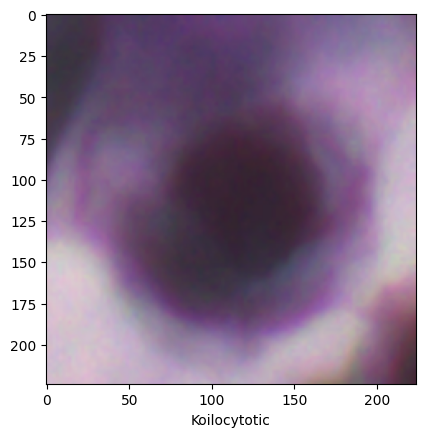

In [ ]:
categories = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]

def show_the_image(i):
    plt.imshow(data[i])
    plt.xlabel(categories[labels[i]])

show_the_image(0)

In [ ]:
# Loading ResNet50 wit imagenet weights, include_top means that we loading model without last fully connected layers
model_resnet       = ResNet50(weights = 'imagenet', include_top = False)
model_densenet     = DenseNet121(weights = 'imagenet', include_top = False)
model_efficientnet = EfficientNetB5(weights = 'imagenet', include_top = False)

features_resnet       = model_resnet.predict(data, batch_size=32)
features_densenet     = model_densenet.predict(data, batch_size=32)
features_efficientnet = model_efficientnet.predict(data, batch_size=32)

print(features_resnet.shape)
print(features_densenet.shape)
print(features_efficientnet.shape)

 30/127 ━━━━━━━━━━━━━━━━━━━━ 9:48 6s/step

In [ ]:
extracted_features = []

for f_r, f_d, f_e, label in zip(features_resnet, features_densenet, features_efficientnet, labels):
    f_r = f_r.reshape(f_r.shape[0] * f_r.shape[1] * f_r.shape[2])
    f_d = f_d.reshape(f_d.shape[0] * f_d.shape[1] * f_d.shape[2])
    f_e = f_e.reshape(f_e.shape[0] * f_e.shape[1] * f_e.shape[2])

    f_r = np.append(f_r, f_d)
    f_r = np.append(f_r, f_e)
    f_r = np.append(f_r, label)
    extracted_features.append(f_r)

extracted_features = np.array(extracted_features)

print(extracted_features.shape)

(4049, 20481)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
# # Normalization :-

X = extracted_features[:, 0:-1]
y = extracted_features[:, -1]

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
# PCA :-

pca = PCA(n_components = 0.95)
pca.fit(scaled_X)
principal_X = pca.transform(scaled_X)

In [ ]:
# Check the values of eigen vectors prodeced by principal components
print(len(pca.components_))
# check how much variance is explained by each principal component
print(pca.explained_variance_ratio_)

1472
[8.22465620e-02 8.04798915e-02 5.73430474e-02 ... 5.21360061e-05
 5.20539381e-05 5.19830826e-05]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principal_X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3239, 1472)
(810, 1472)
(3239,)
(810,)


PCA (Principal Component Analysis) was applied to reduce feature dimensionality while preserving 95% variance.

A fully connected neural network was built using Keras:

    Flatten Layer

    Dense layer (256 neurons, ReLU)

    Dropout layer (rate=0.5)

    Dense output layer (5 neurons with Softmax)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Flatten(input_shape=(X_train.shape[1], 1)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='softmax'))

#Compilation of the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 1472)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         377,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,373 (1.44 MB)

 Trainable params: 378,373 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
nn = model.fit(X_train, y_train, batch_size=32, epochs=epochs)
pred = model.predict(X_test)
y_nn = np.argmax(pred, axis=1)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6230 - loss: 1.0323
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9652 - loss: 0.1646
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9856 - loss: 0.0776
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9945 - loss: 0.0401
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9989 - loss: 0.0244
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9998 - loss: 0.0163
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9998 - loss: 0.0103
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9994 - loss: 0.0101
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9997 - loss: 0.0071
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9999 - loss: 0.0049
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_nn)
print("Accuracy is: ", acc*100)

Accuracy is:  94.44444444444444


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report: \n", classification_report(y_test, y_nn))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       167
         1.0       0.98      0.80      0.88       165
         2.0       0.83      0.95      0.89       132
         3.0       0.99      0.99      0.99       174
         4.0       0.96      0.99      0.97       172

    accuracy                           0.94       810
   macro avg       0.94      0.94      0.94       810
weighted avg       0.95      0.94      0.94       810



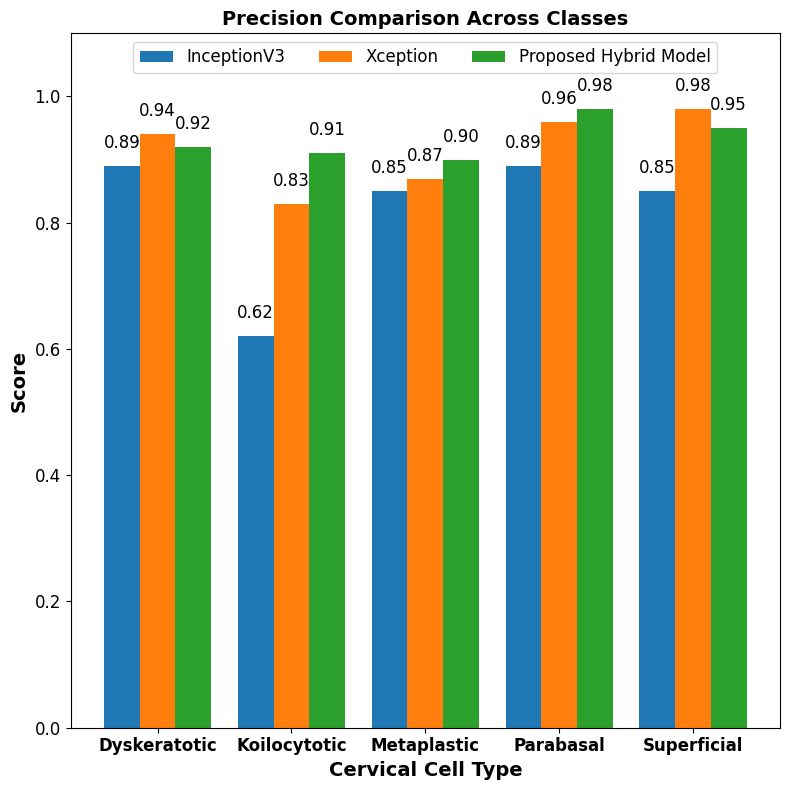

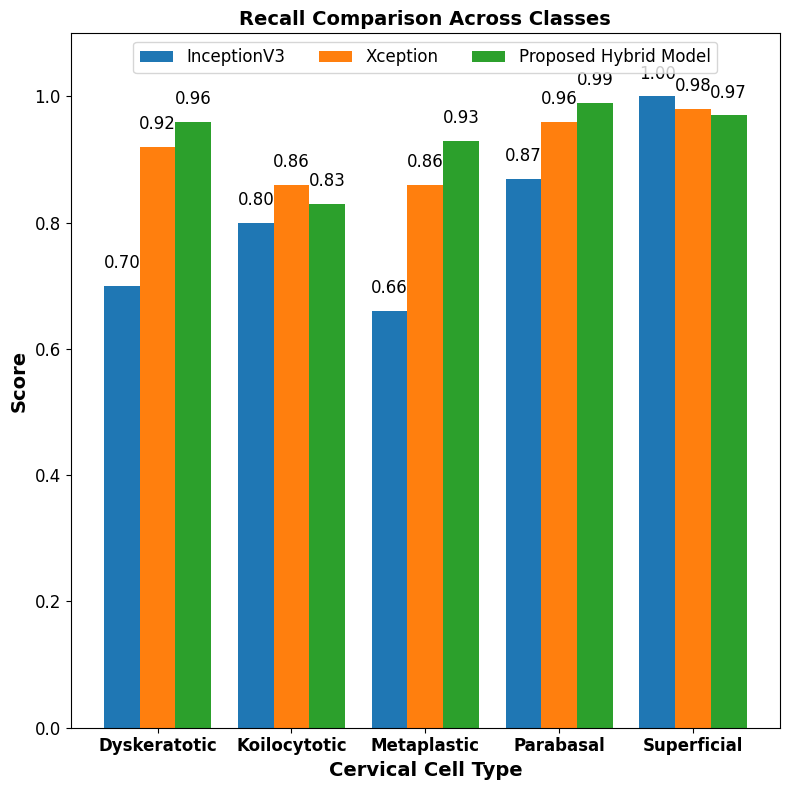

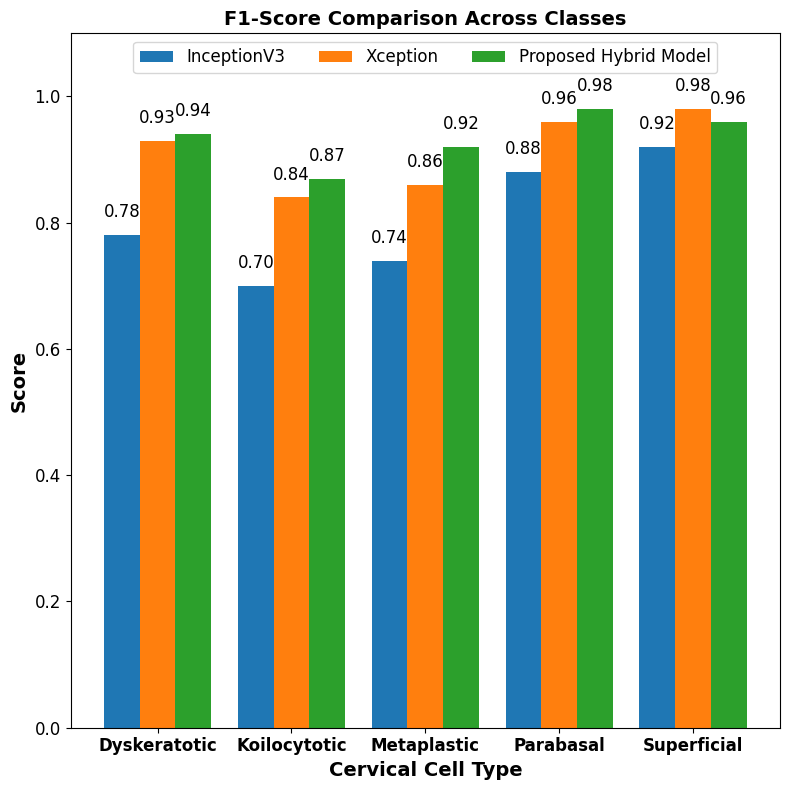

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Data setup
classes = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial"]
models = ["InceptionV3", "Xception", "Proposed Hybrid Model"]

precision_data = [
    [0.89, 0.62, 0.85, 0.89, 0.85],  # InceptionV3
    [0.94, 0.83, 0.87, 0.96, 0.98],   # Xception
    [0.92, 0.91, 0.90, 0.98, 0.95] #Hybrid model
]

recall_data = [
    [0.70, 0.80, 0.66, 0.87, 1.00],
    [0.92, 0.86, 0.86, 0.96, 0.98],
    [0.96, 0.83, 0.93, 0.99, 0.97]
]

f1_data = [
    [0.78, 0.70, 0.74, 0.88, 0.92],
    [0.93, 0.84, 0.86, 0.96, 0.98],
    [0.94, 0.87, 0.92, 0.98, 0.96]
]

# Convert to DataFrames
precision_df = pd.DataFrame(precision_data, columns=classes, index=models)
recall_df = pd.DataFrame(recall_data, columns=classes, index=models)
f1_df = pd.DataFrame(f1_data, columns=classes, index=models)


# Function to plot grouped bar chart for precision, recall, and f1 score
def plot_grouped_bar(df, title):
    ax = df.T.plot(kind="bar", figsize=(8, 8), width=0.8)
    plt.title(title, fontweight='bold', fontsize=14)
    plt.ylabel("Score", fontweight='bold', fontsize=14)
    plt.xlabel("Cervical Cell Type", fontweight='bold', fontsize=14)
    plt.ylim(0, 1.1)  # Extend the y-axis to give space for annotations
    plt.yticks(fontsize=12)

    # Rotate the class labels by 30 degrees
    plt.xticks(fontsize=12, fontweight='bold', rotation=360)

    # Place the legend horizontally at the top inside the graph (no 'Model' in the legend)
    plt.legend(loc='upper center', ncol=3, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Annotate the bars with their respective values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=12)

    # Adjust grid and layout
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Plot precision, recall, and f1-score comparisons
plot_grouped_bar(precision_df, "Precision Comparison Across Classes")
plot_grouped_bar(recall_df, "Recall Comparison Across Classes")
plot_grouped_bar(f1_df, "F1-Score Comparison Across Classes")

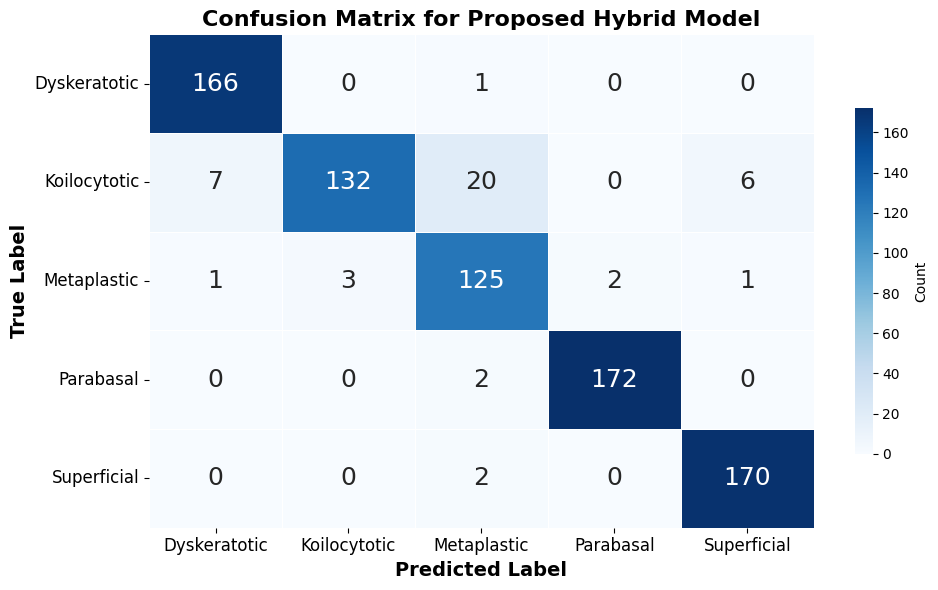

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_nn)

# Define class labels
class_labels = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial"]

# Plot using the same blue gradient colormap
plt.figure(figsize=(10, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap="Blues",  # Matching the style from your uploaded image
    xticklabels=class_labels,
    yticklabels=class_labels,
    annot_kws={"size": 18},
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.7, "label": "Count"}
)
plt.xlabel("Predicted Label", fontsize=14, fontweight='bold')
plt.ylabel("True Label", fontsize=14, fontweight='bold')
plt.title("Confusion Matrix for Proposed Hybrid Model", fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


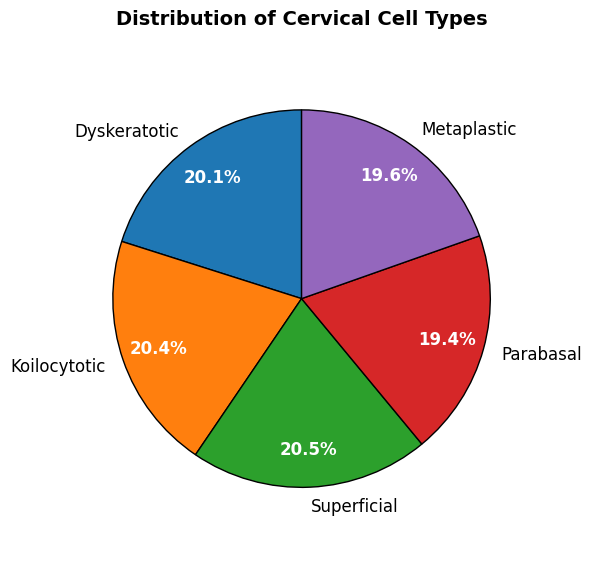

In [ ]:
import matplotlib.pyplot as plt

# Labels and corresponding data
labels = [
    'Dyskeratotic',
    'Koilocytotic',
    'Superficial',
    'Parabasal',
    'Metaplastic'
]
sizes = [20.1, 20.4, 20.5, 19.4, 19.6]  # percentages from the image

# Create the pie chart with outlined wedges
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12},
    pctdistance=0.8,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Outline added here
)

# Set value (percentage) font color and weight
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.axis('equal')  # Draw as circle
plt.title('Distribution of Cervical Cell Types', fontsize=14, fontweight='bold', pad=-2500)
plt.tight_layout()
plt.savefig('data_distribution.png', dpi=300)
plt.show()


In [ ]:
pip install scikit-learn matplotlib

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
# You have 5 classes: [0, 1, 2, 3, 4]
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

In [ ]:
y_score = model.predict(X_test)  # Already softmax probabilities for each class

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

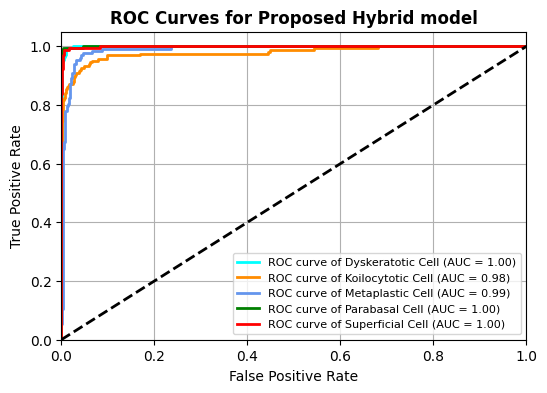

In [ ]:
# Plot ROC curve for each class
plt.figure(figsize=(6, 4))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial"]

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of {0} Cell (AUC = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Proposed Hybrid model', fontweight='bold')
plt.legend(loc='lower right', prop={'size': 8}, frameon=True)
plt.grid()
plt.show()

In [ ]:
# Micro-average AUC
roc_auc_micro = roc_auc_score(y_test_bin, y_score, average='micro')
print("Micro-average AUC: {:.2f}".format(roc_auc_micro))

# Macro-average AUC
roc_auc_macro = roc_auc_score(y_test_bin, y_score, average='macro')
print("Macro-average AUC: {:.2f}".format(roc_auc_macro))

Micro-average AUC: 0.99
Macro-average AUC: 0.99
